# **Statlog Heart:** Clustering
Aurellia Gita Elysia | 2602569722

Dataset:<br>
https://archive.ics.uci.edu/dataset/145/statlog%252Bheart

-------

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# 2. Load Dataset

In [2]:
file_path = 'statlog_heart/heart.dat' 

In [3]:
column_names = [
    'age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholestoral',
    'fasting_blood_sugar', 'resting_electrocardiographic_results', 'max_heart_rate_achieved',
    'exercise_induced_angina', 'oldpeak', 'slope_peak_st_segment', 'num_major_vessels',
    'thal', 'presence'
]

df = pd.read_csv(file_path, header=None, names=column_names, sep=' ')
df.head(15)

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_peak_st_segment,num_major_vessels,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
5,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,1
6,56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2
7,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,2
8,60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0,2
9,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,2


# 3. Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    float64
 1   sex                                   270 non-null    float64
 2   chest_pain_type                       270 non-null    float64
 3   resting_blood_pressure                270 non-null    float64
 4   serum_cholestoral                     270 non-null    float64
 5   fasting_blood_sugar                   270 non-null    float64
 6   resting_electrocardiographic_results  270 non-null    float64
 7   max_heart_rate_achieved               270 non-null    float64
 8   exercise_induced_angina               270 non-null    float64
 9   oldpeak                               270 non-null    float64
 10  slope_peak_st_segment                 270 non-null    float64
 11  num_major_vessels  

In [5]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_peak_st_segment,num_major_vessels,thal,presence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


# 4. Data Preprocessing

## 4.1. Duplicate Data

In [6]:
print('Duplicates in dataset:', df.duplicated().sum())

Duplicates in dataset: 0


**💡 Explanation:**<br>
> There are no duplicates in the dataset

## 4.2. Missing Value

In [7]:
df.isnull().sum()

age                                     0
sex                                     0
chest_pain_type                         0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
oldpeak                                 0
slope_peak_st_segment                   0
num_major_vessels                       0
thal                                    0
presence                                0
dtype: int64

**💡 Explanation:**<br>
> There are no missing values in the dataset

## 4.3. Feature Engineering

In [8]:
# Create Features
df['age_to_max_heart_rate'] = df['age'] / df['max_heart_rate_achieved']
df['cholesterol_to_blood_pressure'] = df['serum_cholestoral'] / df['resting_blood_pressure']
df['log_serum_cholestoral'] = np.log(df['serum_cholestoral'])
df['angina_max_heart_rate'] = df['exercise_induced_angina'] * df['max_heart_rate_achieved']
df['age_cholesterol_interaction'] = df['age'] * df['serum_cholestoral']
df['blood_pressure_max_heart_rate'] = df['resting_blood_pressure'] * df['max_heart_rate_achieved']

# Display the new features in the DataFrame
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_peak_st_segment,num_major_vessels,thal,presence,age_to_max_heart_rate,cholesterol_to_blood_pressure,log_serum_cholestoral,angina_max_heart_rate,age_cholesterol_interaction,blood_pressure_max_heart_rate
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2,0.642202,2.476923,5.774552,0.0,22540.0,14170.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1,0.418750,4.904348,6.335054,0.0,37788.0,18400.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2,0.404255,2.104839,5.564520,0.0,14877.0,17484.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1,0.609524,2.054688,5.572154,105.0,16832.0,13440.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1,0.611570,2.241667,5.594711,121.0,19906.0,14520.0


**💡 Explanation:**<br>
> Feature engineering is a crucial step in improving model performance by creating meaningful transformations of existing data. In this section, several new features were derived from the original dataset to better capture relationships between key health indicators such as age, cholesterol, blood pressure, heart rate, and exercise-induced angina.
>
> The engineered features include ratios (e.g., `age_to_max_heart_rate`, `cholesterol_to_blood_pressure`), logarithmic transformations (e.g., `log_serum_cholesterol`), and interaction terms (e.g., `age_cholesterol_interaction`, `blood_pressure_max_heart_rate`). These transformations help normalize skewed distributions, enhance feature relationships, and provide the model with more relevant signals for predicting heart disease.
>
> By incorporating these features, the model gains additional insights, potentially leading to improved classification accuracy and better identification of individuals at risk of heart disease.

## 4.3. Encode Categorical Variables

In [9]:
label_encoder = LabelEncoder()

# Label Encoder for columns with data order
df['slope_peak_st_segment'] = label_encoder.fit_transform(df['slope_peak_st_segment'])
df['fasting_blood_sugar'] = label_encoder.fit_transform(df['fasting_blood_sugar'])

# One-Hot Encoding for columns with no data order
df = pd.get_dummies(df, columns=['chest_pain_type', 'thal', 'sex'], drop_first=True)

df.head()

,age,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_peak_st_segment,num_major_vessels,...,log_serum_cholestoral,angina_max_heart_rate,age_cholesterol_interaction,blood_pressure_max_heart_rate,chest_pain_type_2.0,chest_pain_type_3.0,chest_pain_type_4.0,thal_6.0,thal_7.0,sex_1.0
0,70.0,130.0,322.0,0,2.0,109.0,0.0,2.4,1,3.0,...,5.774552,0.0,22540.0,14170.0,False,False,True,False,False,True
1,67.0,115.0,564.0,0,2.0,160.0,0.0,1.6,1,0.0,...,6.335054,0.0,37788.0,18400.0,False,True,False,False,True,False
2,57.0,124.0,261.0,0,0.0,141.0,0.0,0.3,0,0.0,...,5.564520,0.0,14877.0,17484.0,True,False,False,False,True,True
3,64.0,128.0,263.0,0,0.0,105.0,1.0,0.2,1,1.0,...,5.572154,105.0,16832.0,13440.0,False,False,True,False,True,True
4,74.0,120.0,269.0,0,2.0,121.0,1.0,0.2,0,1.0,...,5.594711,121.0,19906.0,14520.0,True,False,False,False,False,False


**💡 Explanation:**<br>
> **Label encoding** is applied to `slope_peak_st_segment` and `fasting_blood_sugar`, as these features have a **natural order**. `slope_peak_st_segment` represents different slopes of the ST segment during peak exercise, which follows a ranked order, while `fasting_blood_sugar` is binary (0 or 1) and benefits from numerical consistency.
>
> **One-hot encoding** is used for `chest_pain_type`, `thal`, and `sex`, as these categories have **no inherent order**. The drop_first=True parameter is used to remove one category per feature, preventing redundancy and reducing multicollinearity.

In [10]:
# Convert bool columns to int64 (1 = True, 0 = False)
bool_columns = df.select_dtypes(include=['bool']).columns

for col in bool_columns:
    df[col] = df[col].astype('int64')

df = df.apply(pd.to_numeric, errors='coerce')

## 4.4. Split Test/Train Data

In [11]:
# Split the data into features (X) and target (y)
X = df.drop(columns='presence')
y = df['presence']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## 4.5. Class Imbalance

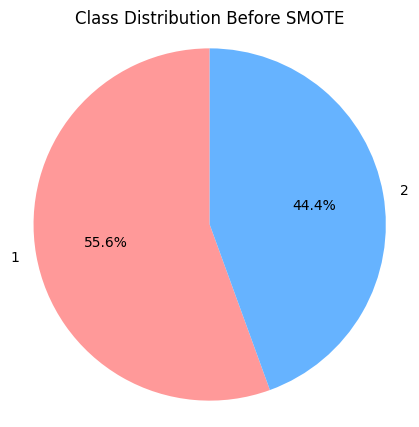

In [12]:
class_distribution_original = y.value_counts()

plt.figure(figsize=(5, 5))
plt.pie(class_distribution_original, labels=class_distribution_original.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Class Distribution Before SMOTE')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

In [13]:
# Initialize SMOTE
smote = SMOTE(random_state=5)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Show the shape of the original and resampled data to compare
print("Original training data shape:", X_train.shape)
print("Resampled training data shape:", X_train_resampled.shape)

Original training data shape: (216, 22)
Resampled training data shape: (232, 22)


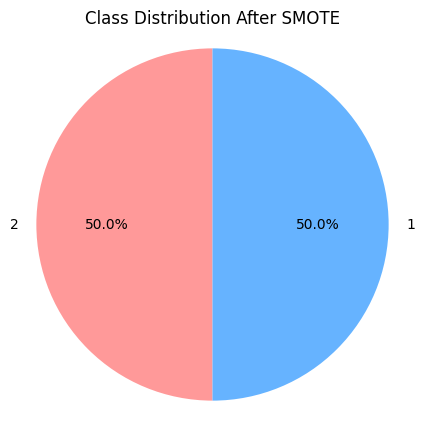

In [14]:
class_distribution_resampled = y_train_resampled.value_counts()

# Pie chart for resampled class distribution
plt.figure(figsize=(5, 5))
plt.pie(class_distribution_resampled, labels=class_distribution_resampled.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Class Distribution After SMOTE')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

**💡 Explanation:**<br>
> Before applying SMOTE, the class distribution was **55.6% for Class 1 (absence of heart disease)** and **44.4% for Class 2 (presence of heart disease)**. Although the imbalance is not extreme, it can still lead to biased predictions where the model favors the majority class. Thus the SMOTE was applied.

# 5. Decision Tree

## 5.1. Feature Selection

In [15]:
dt_model = DecisionTreeClassifier(random_state=5)

rfe = RFE(dt_model, n_features_to_select=10)  # Set the number of features to select
rfe.fit(X_train_resampled, y_train_resampled)
# Fit RFE on the training data
selected_features = X_train_resampled.columns[rfe.support_]
print("Selected features:", selected_features)

# New dataset with only the selected features
X_train_rfe = X_train_resampled[selected_features]

Selected features: Index(['max_heart_rate_achieved', 'oldpeak', 'num_major_vessels',
       'age_to_max_heart_rate', 'log_serum_cholestoral',
       'age_cholesterol_interaction', 'blood_pressure_max_heart_rate',
       'chest_pain_type_4.0', 'thal_7.0', 'sex_1.0'],
      dtype='object')


**💡 Explanation:**<br>
> This section applies Recursive Feature Elimination (RFE) to select the most relevant features for model training. RFE works by recursively eliminating the least important features until only the most predictive ones remain. In this case, a Decision Tree Classifier is used as the base estimator to rank feature importance.
>
> RFE is configured to select the top 10 features, which are then used for training the final model. By using only the most relevant features, the model is expected to perform more efficiently while reducing noise from less informative variables.

## 5.2. Train Model

In [16]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_rfe, y_train_resampled)

# Best parameters
best_dt_params = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

print("Best parameters from GridSearchCV:\n", best_dt_params)

Best parameters from GridSearchCV:
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


**💡 Explanation:**<br>
> **GridSearchCV** performs a 5-fold cross-validation to evaluate different combinations of these parameters, selecting the ones that yield the highest accuracy. The best parameter set found is `max_depth=5`, `min_samples_leaf=2`, and `min_samples_split=5`, which balances complexity and generalization. This optimized model `(best_dt_model)` is now ready for evaluation on the test set.

## 5.3. Evaluate Model

In [17]:
# Evaluate the Decision Tree model
y_pred_dt = best_dt_model.predict(X_test[selected_features])

dt_report = classification_report(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree\nClassification Report:\n", dt_report)
print(f"Confusion Matrix:\n", dt_conf_matrix)

Decision Tree
Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.85      0.84        34
           2       0.74      0.70      0.72        20

    accuracy                           0.80        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.79      0.80      0.80        54

Confusion Matrix:
 [[29  5]
 [ 6 14]]


# 6. Naive Bayes Classifier

## 6.1. Feature Selection

In [18]:
# Filter dataset with selected features
X_train_rfe = X_train_resampled[selected_features]
X_test_rfe = X_test[selected_features]

# Scale the data for MultinomialNB (Since NB requires positive, count-like data)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_rfe)
X_test_scaled = scaler.transform(X_test_rfe)

**💡 Explanation:**<br>
> This section prepares the dataset for **Multinomial Naive Bayes (MultinomialNB)** by applying **feature selection** and **data scaling**. Since Naive Bayes models assume count-like or probability-like features, it is necessary to ensure that all input values are **positive and normalized**.
>
> First, the dataset is **filtered to retain only the top selected features**, ensuring consistency between the training `(X_train_rfe)` and test `(X_test_rfe)` sets. These features were previously chosen through **Recursive Feature Elimination (RFE)** using a Decision Tree.
>
> Next, **MinMaxScaler** is applied to scale the data. This transformation rescales all feature values into a range between **0 and 1**, preserving the original distribution while ensuring that Naive Bayes can interpret them correctly. Since MultinomialNB expects non-negative inputs, this step prevents potential issues related to negative or unnormalized values.

## 6.2. Train Model

In [19]:
# Initialize MultinomialNB
nb_model = MultinomialNB()

# Define hyperparameter grid for Naive Bayes
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],  # Smoothing parameter
    'fit_prior': [True, False]  # Learn class prior probabilities
}

# Perform GridSearchCV to find the best parameters
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train_scaled, y_train_resampled)

# Best model from GridSearchCV
best_nb_params = grid_search_nb.best_params_
best_nb_model = grid_search_nb.best_estimator_

print("Best parameters from GridSearchCV:\n", best_nb_params)

Best parameters from GridSearchCV:
 {'alpha': 0.1, 'fit_prior': False}


## 6.2. Evaluate Model

In [20]:
# Evaluate Naive Bayes model
y_pred_nb = best_nb_model.predict(X_test_scaled)

# Generate Classification Report and Confusion Matrix
nb_report = classification_report(y_test, y_pred_nb)
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)

print(f"Naive Bayes\nClassification Report:\n", nb_report)
print(f"Confusion Matrix:\n", nb_conf_matrix)

Naive Bayes
Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.82      0.85        34
           2       0.73      0.80      0.76        20

    accuracy                           0.81        54
   macro avg       0.80      0.81      0.81        54
weighted avg       0.82      0.81      0.82        54

Confusion Matrix:
 [[28  6]
 [ 4 16]]


---

# 📑 **Concept of Feature Engineering and Selection**  

Feature engineering and feature selection are crucial steps in improving model accuracy by optimizing the representation of data fed into machine learning algorithms. In this project, various feature engineering and selection techniques were applied to enhance the model’s ability to detect heart disease.  

## **Feature Engineering**  
Feature engineering was performed by creating new features that provide more meaningful information than the original ones. Several techniques implemented in this dataset include:  

### **Important Ratio Features**  
- `age_to_max_heart_rate` = `age` / `max_heart_rate_achieved` → Measures the relationship between age and maximum heart rate capacity, which is an important indicator of cardiovascular health.  
- `cholesterol_to_blood_pressure` = `serum_cholestoral` / `resting_blood_pressure` → Combines two major heart disease risk factors to assess the relationship between blood pressure and cholesterol levels.  

### **Logarithmic Transformation**  
- `log_serum_cholestoral` = `log(serum_cholestoral)` → Reduces the impact of skewed distributions in cholesterol levels, allowing the model to capture patterns more effectively.  

### **Feature Interactions**  
- `age_cholesterol_interaction` = `age` * `serum_cholestoral` → Combines age and cholesterol levels to assess how heart disease risk increases with age.  
- `blood_pressure_max_heart_rate` = `resting_blood_pressure` * `max_heart_rate_achieved` → Measures cardiovascular stress by considering both blood pressure and heart rate.  

### **Categorical Variable Encoding**  
- One-Hot Encoding was applied to categorical variables such as `chest_pain_type`, `thal`, and `sex`, ensuring that the model could process them without imposing an incorrect ordinal relationship.  

## **Feature Selection**  
To improve model efficiency and reduce noise, feature selection was applied using **Recursive Feature Elimination (RFE)** with a **Decision Tree** as the base estimator. RFE systematically removed less important features, retaining only the most predictive ones. The final set of selected features included a combination of original, engineered, and categorical features, such as **`max_heart_rate_achieved`**, **`num_major_vessels`**, **`oldpeak`**, **`log_serum_cholestoral`**, and **`thal_7.0`**.  

Feature selection was crucial in optimizing model performance by eliminating irrelevant or redundant features, preventing overfitting, and improving generalization. The combination of feature engineering and selection contributed to the improved accuracy of both the **Decision Tree (80%)** and **Naive Bayes (81%)** models, ensuring a well-balanced prediction capability.


---

# 📊 **Final Analysis**
The evaluation results compare the performance of the **Decision Tree Classifier** and **Naive Bayes Classifier** based on precision, recall, and F1-score. Both models achieved an overall accuracy of around **80-81%**, indicating strong predictive performance after feature selection and hyperparameter tuning.  

## **Decision Tree Performance**  
- **Accuracy:** 80%  
- **Class 1 (No Heart Disease):** Precision = 83%, Recall = 85%, F1-score = 84%  
- **Class 2 (Heart Disease Present):** Precision = 74%, Recall = 70%, F1-score = 72%  

The Decision Tree model performed well overall but had a **higher recall for Class 1 (85%)**, meaning it was better at correctly identifying patients **without heart disease**. However, its recall for Class 2 (70%) was lower, indicating it missed some actual positive cases of heart disease. The **precision for Class 2 (74%)** suggests some false positives, but overall, the model strikes a reasonable balance between sensitivity and specificity.  

## **Naive Bayes Performance**  
- **Accuracy:** 81%  
- **Class 1 (No Heart Disease):** Precision = 88%, Recall = 82%, F1-score = 85%  
- **Class 2 (Heart Disease Present):** Precision = 73%, Recall = 80%, F1-score = 76%  

The Naive Bayes model outperformed the Decision Tree slightly with **higher recall for Class 2 (80%)**, making it more effective at identifying **patients with heart disease**. The **precision for Class 1 (88%)** was also higher, meaning it made **fewer false positive predictions** for those without heart disease. However, its recall for Class 1 (82%) was slightly lower, meaning it missed a few negative cases.  

## **Conclusion**  
Both models performed well, but **Naive Bayes is slightly better at detecting heart disease (Class 2) due to its higher recall (80%)**, making it a more balanced choice for **medical diagnosis where false negatives are critical**. However, **Decision Trees offer better interpretability**, making them useful for understanding **feature importance in heart disease prediction**.